# Simple linear classification

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean = [0, 3], cov = [[1, 0.5], [0.5, 1]], size = num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean = [3, 0], cov = [[1, 0.5], [0.5, 1]], size = num_samples_per_class)
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype = 'float32'), 
                     np.ones((num_samples_per_class, 1), dtype = 'float32')))

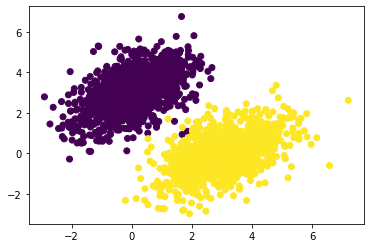

In [3]:
plt.scatter(inputs[:, 0], inputs[:, 1], c = targets[:, 0])
plt.show()

In [4]:
input_dim = 2
output_dim = 1
W = tf.Variable(tf.random.uniform(shape = (input_dim, output_dim)))
b = tf.Variable(tf.zeros(shape = (output_dim,)))

In [5]:
#forward pass
def model(inputs):
    return tf.matmul(inputs, W) + b

def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

learning_rate = 0.1
def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    gradient_loss_wrt_W, gradient_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * gradient_loss_wrt_W)
    b.assign_sub(learning_rate * gradient_loss_wrt_b)
    return loss

In [6]:
for step in range(30):
    loss = training_step(inputs, targets)
    print("Loss at step {}: {}".format(step, loss))

Loss at step 0: 7.058712005615234
Loss at step 1: 0.8977240324020386
Loss at step 2: 0.2580122649669647
Loss at step 3: 0.16679534316062927
Loss at step 4: 0.14529138803482056
Loss at step 5: 0.13342741131782532
Loss at step 6: 0.1235952079296112
Loss at step 7: 0.11476748436689377
Loss at step 8: 0.10674824565649033
Loss at step 9: 0.09945155680179596
Loss at step 10: 0.0928107425570488
Loss at step 11: 0.08676676452159882
Loss at step 12: 0.08126583695411682
Loss at step 13: 0.07625924795866013
Loss at step 14: 0.07170257717370987
Loss at step 15: 0.06755539029836655
Loss at step 16: 0.06378085166215897
Loss at step 17: 0.06034550070762634
Loss at step 18: 0.057218849658966064
Loss at step 19: 0.05437317490577698
Loss at step 20: 0.051783233880996704
Loss at step 21: 0.04942600429058075
Loss at step 22: 0.04728059470653534
Loss at step 23: 0.04532797262072563
Loss at step 24: 0.04355081915855408
Loss at step 25: 0.04193337261676788
Loss at step 26: 0.04046125337481499
Loss at step 27

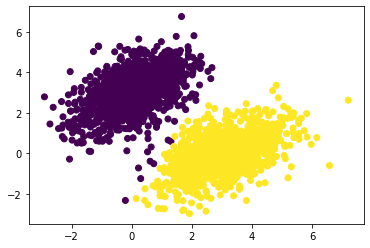

In [7]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c = predictions[:, 0] > 0.5)

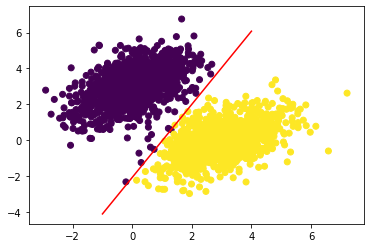

In [8]:
x = np.linspace(-1, 4, 100)
y = -W[0]/W[1] * x + (0.5 - b)/W[1]
plt.plot(x, y, '-r')
plt.scatter(inputs[:, 0], inputs[:, 1], c = predictions[:, 0] > 0.5)